# Data Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')

C:\Users\SANDEEP YADAV\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Reading The Data....

In [2]:
data = pd.read_csv('C://Users//SANDEEP YADAV//Desktop//Major2Poject//employee_data.csv', delimiter=',')

In [3]:
print(data.shape)

(14999, 12)


$ Finding Missing Values:

In [4]:
data.apply(lambda x: sum(x.isnull()))

name                      1
satisfaction_level        0
last_evaluation           0
number_projects           0
average_monthly_hours     0
time_spent_company        0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
salary_level              0
dtype: int64

In [5]:
data.head()

,name,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary,salary_level
0,SMITH,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,JOHNSON,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,WILLIAMS,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,BROWN,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,JONES,0.37,0.52,2,159,3,0,1,0,sales,low,1


One thing can be infered from above that salary and salary_level represents the same thing beacuse :

* low=1
* medium=2
* high=3

In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


From this the following things can be analysed :

1.The avg satisfaction_level is > 0.6 - this clearly states that it is a not a major factor and along with it there are other factors too which are affecting the employees i.e last_evaluation whose avg > 0.7.

2.The employee is having of nearly 2 years of experience in the company and gets avg salary.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
name                      14998 non-null object
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
number_projects           14999 non-null int64
average_monthly_hours     14999 non-null int64
time_spent_company        14999 non-null int64
work_accident             14999 non-null int64
left                      14999 non-null int64
promotion_last_5_years    14999 non-null int64
department                14999 non-null object
salary                    14999 non-null object
salary_level              14999 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 1.4+ MB


In [8]:
print(data[data['name']==""].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
name                      0 non-null object
satisfaction_level        0 non-null float64
last_evaluation           0 non-null float64
number_projects           0 non-null int64
average_monthly_hours     0 non-null int64
time_spent_company        0 non-null int64
work_accident             0 non-null int64
left                      0 non-null int64
promotion_last_5_years    0 non-null int64
department                0 non-null object
salary                    0 non-null object
salary_level              0 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 0.0+ bytes
None


Finding and filtering categorical variables:

In [9]:
categorical = data.dtypes[data.dtypes=="object"].index

print(categorical)

Index(['name', 'department', 'salary'], dtype='object')


Looking at the number of unique values in each of them:

In [10]:
data[categorical].apply(lambda x: len(x.unique()))

name          14999
department       10
salary            3
dtype: int64

* This tells us that allthe data is unique.
* There are 10 departments.
* And the salary types is = 3.

In [11]:
data[categorical].describe()

,name,department,salary
count,14998,14999,14999
unique,14998,10,3
top,GOUIN,sales,low
freq,1,4140,7316


In [12]:
#Excluding Name:

categorical_columns = [x for x in categorical if x not in ['name']]

#Printing Frequency of categories:

for col in categorical_columns:
    print('\nFrequency of Categories for variable :',col)
    print(data[col].value_counts())


Frequency of Categories for variable : department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Frequency of Categories for variable : salary
low       7316
medium    6446
high      1237
Name: salary, dtype: int64


The output gives us following observations:

1.department: We can go for two broad categories of department i.e Technical And Non-Technical.

2.salary: Mojority employees lies in the category of low and med salary type.

But we should check if that’s a good idea before doing it.

# Data Cleaning

Imputing Missing Values : Since there is no missing values so no such requirement is there....

In [13]:
data.apply(lambda x: sum(x.isnull()))

name                      1
satisfaction_level        0
last_evaluation           0
number_projects           0
average_monthly_hours     0
time_spent_company        0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
salary_level              0
dtype: int64

In [14]:
data.head()

,name,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary,salary_level
0,SMITH,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,JOHNSON,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,WILLIAMS,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,BROWN,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,JONES,0.37,0.52,2,159,3,0,1,0,sales,low,1


Exporting Data...

In [15]:
data.drop('name',axis=1,inplace=True)

In [16]:
data.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


# Feature Engineering

In [17]:
data['salary'][data['salary']=='low']=0
data['salary'][data['salary']=='medium']=1
data['salary'][data['salary']=='high']=2

data.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,0,1
1,0.80,0.86,5,262,6,0,1,0,sales,1,2
2,0.11,0.88,7,272,4,0,1,0,sales,1,2
3,0.72,0.87,5,223,5,0,1,0,sales,0,1
4,0.37,0.52,2,159,3,0,1,0,sales,0,1


In [18]:
data.drop('salary_level',axis=1,inplace=True)
data.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [19]:
data['department'][data['department']=='sales']=0
data['department'][data['department']=='hr']=0
data['department'][data['department']=='marketing']=0
data['department'][data['department']=='management']=0
data['department'][data['department']=='accounting']=0


data['department'][data['department']=='technical']=1
data['department'][data['department']=='RandD']=1
data['department'][data['department']=='IT']=1
data['department'][data['department']=='product_mng']=1
data['department'][data['department']=='support']=1

data.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


So let’s define who are the best and most experienced employees..
                (above average)

* Last Evaluation >= 0.74
* time_spend_company >= 4
* number_project > 4
* About 1944 people 

In [20]:
good_employee_data = data.loc[data['last_evaluation'] >= 0.74].loc[data['time_spent_company'] >= 4].loc[data['number_projects'] > 4]
good_employee_data.shape

(1944, 10)

Make A File For Good People.....

In [21]:
#good_employee_data.to_csv('C://Users//SANDEEP YADAV//Desktop//Major2Poject//good_employee2_data.csv')
print('Done.....!!!')

Done.....!!!


In [22]:
df = pd.DataFrame(data)
df.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [23]:
# import pickle
# df = df.reindex(np.random.permutation(df.index))
# df.head()
# pickle_out = open('pickle_data.pickle','wb')
# pickle.dump(df, pickle_out)
# pickle_out.close() 

#df.shape

In [24]:
import pickle
pickle_in = open('pickle_data.pickle','rb')
data_1= pickle.load(pickle_in)
data_1.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary
10393,0.83,0.77,3,260,2,0,0,0,0,1
7821,0.42,0.41,5,240,2,0,0,0,1,1
10725,0.52,0.55,3,225,2,0,0,0,1,0
3194,0.57,0.65,5,177,2,0,0,0,1,2
1601,0.68,0.62,5,198,5,1,1,0,1,0


Making traing and testing data......

In [25]:
X = data_1.loc[:, data_1.columns != 'left']
Y = data_1.loc[:, data_1.columns == 'left']
# X = np.array(df.drop(['left'],1))
# X = preprocessing.scale(X)
# Y = np.array(df['left'])
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2, random_state=5)

In [26]:
print(Y_test[Y_test['left']==1].count())

left    694
dtype: int64


# SVM.SVC Classifier

In [27]:
features_one = X_train[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","department","salary"]].values
num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
                               
clf = svm.SVC()
clf.fit(features_one, Y_train)
# save_classifier = open("svm_svc.pickle","wb")
# pickle.dump(clf, save_classifier)
# save_classifier.close()

#Print the Models Coefficients
#print(clf.coef_)

# Print normal score
print(clf.score(features_one, Y_train))

results1 = cross_validation.cross_val_score(clf, features_one, Y_train, cv=kfold,scoring=scoring1)

#Print cross validation score
print(results1.mean(), results1.std())

results2 = cross_validation.cross_val_score(clf, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

test_features = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","department","salary"]].values
# Make your prediction using the test set
svm_prediction = clf.predict(test_features)

acc = accuracy_score(Y_test, svm_prediction)
precision = precision_score(Y_test, svm_prediction)
recall = recall_score(Y_test, svm_prediction)
f1score = f1_score(Y_test, svm_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(svm_prediction))


#print(clf.feature_importances_)

0.961580131678
0.953413191549 0.00594190327005
0.969577312208 0.00611427341295
Accuracy of the algorithm:  0.952666666667
Precison of the algorithm:  0.876021798365
Recall of the algorithm:  0.9265129683
F1_Score of the algorithm:  0.90056022409
Total number of employees which are likely to leave:  734


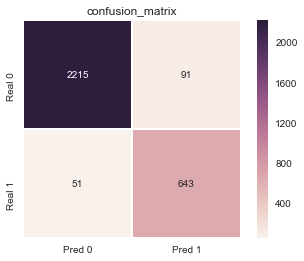

In [28]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, svm_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

# Logistic Regression

In [29]:
#target = X_train["left"].values

features_one = X_train[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","department","salary"]].values
num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
                               
logistic_model = LogisticRegression(solver='newton-cg',n_jobs=-1)
logistic_model.fit(features_one, Y_train)
# save_classifier = open("logistic_model.pickle","wb")
# pickle.dump(logistic_model, save_classifier)
# save_classifier.close()

# Print the Models Coefficients
print(logistic_model.coef_)

# Print normal score
print(logistic_model.score(features_one, Y_train))

results1 = cross_validation.cross_val_score(logistic_model, features_one, Y_train, cv=kfold,scoring=scoring1)

#Print cross validation score
print(results1.mean(), results1.std())

results2 = cross_validation.cross_val_score(logistic_model, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

# Extract the features from the test set:
test_features = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","department","salary"]].values
# Make your prediction using the test set:
lg_prediction = logistic_model.predict(test_features)

acc = accuracy_score(Y_test, lg_prediction)
precision = precision_score(Y_test,lg_prediction)
recall = recall_score(Y_test, lg_prediction)
f1score = f1_score(Y_test, lg_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(lg_prediction))

#print(logistic_model.feature_importances_)

[[ -3.99226523e+00   7.54724095e-01  -2.76887727e-01   3.94690625e-03
    2.67736318e-01  -1.57044121e+00  -1.36178560e+00   2.43756117e-03
   -7.02353828e-01]]
0.78548212351
0.784649638588 0.0107463215542
0.817197848592 0.0140714886736
Accuracy of the algorithm:  0.788666666667
Precison of the algorithm:  0.579365079365
Recall of the algorithm:  0.315561959654
F1_Score of the algorithm:  0.408582089552
Total number of employees which are likely to leave:  378


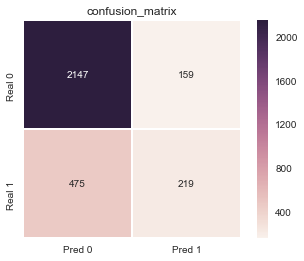

In [30]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, lg_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

# Decision Tree Classifier

In [31]:
# Using Decision Trees

features_one = X_train[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","department","salary"]].values
num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
 #decision tree performs well with "satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company"                              
decision_tree = DecisionTreeClassifier()
decision_tree.fit(features_one, Y_train)
# save_classifier = open("decision_tree.pickle","wb")
# pickle.dump(decision_tree, save_classifier)
# save_classifier.close()

# Print normal score
print(decision_tree.score(features_one, Y_train))

results1 = cross_validation.cross_val_score(decision_tree, features_one, Y_train, cv=kfold,scoring=scoring1)

#Print cross validation score
print(results1.mean(), results1.std())

results2 = cross_validation.cross_val_score(decision_tree, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

# Extract the features from the test set:
test_features = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","department","salary"]].values
# Make your prediction using the test set:
dt_prediction = decision_tree.predict(test_features)

acc = accuracy_score(Y_test, dt_prediction)
precision = precision_score(Y_test, dt_prediction)
recall = recall_score(Y_test, dt_prediction)
f1score = f1_score(Y_test, dt_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(dt_prediction))

print(decision_tree.feature_importances_ )

1.0
0.978248123436 0.00312850903169
0.975572930759 0.00524355992256
Accuracy of the algorithm:  0.978333333333
Precison of the algorithm:  0.936199722607
Recall of the algorithm:  0.972622478386
F1_Score of the algorithm:  0.95406360424
Total number of employees which are likely to leave:  721
[  4.89956198e-01   1.50784882e-01   1.03469628e-01   9.77820779e-02
   1.46615741e-01   2.16682080e-03   3.28244688e-04   3.66782026e-03
   5.22858787e-03]


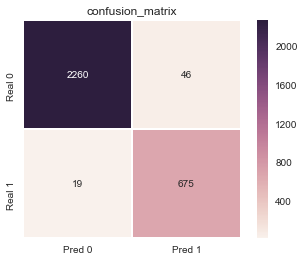

In [32]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, dt_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

# Random Forest

In [33]:
# Using Random Forest

features_one = X_train[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","department","salary"]].values
num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
                               
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
forest.fit(features_one, Y_train)
# save_classifier = open("random_forest.pickle","wb")
# pickle.dump(forest, save_classifier)
# save_classifier.close()


# Print normal score
print(forest.score(features_one, Y_train))

results1 = cross_validation.cross_val_score(forest, features_one, Y_train, cv=kfold,scoring=scoring1)

#Print cross validation score
print(results1.mean(), results1.std())

results2 = cross_validation.cross_val_score(forest, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

# Extract the features from the test set:
test_features = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","department","salary"]].values
# Make your prediction using the test set:
forest_prediction = forest.predict(test_features)

acc = accuracy_score(Y_test, forest_prediction)
precision = precision_score(Y_test, forest_prediction)
recall = recall_score(Y_test, forest_prediction)
f1score = f1_score(Y_test, forest_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(forest_prediction))

print(forest.feature_importances_)

0.985582131844
0.980582082291 0.00465430707209
0.992462504649 0.00409228902068
Accuracy of the algorithm:  0.986333333333
Precison of the algorithm:  0.993948562784
Recall of the algorithm:  0.946685878963
F1_Score of the algorithm:  0.969741697417
Total number of employees which are likely to leave:  661
[ 0.33523165  0.1179957   0.1936789   0.14309664  0.19414823  0.00577633
  0.00079891  0.0024411   0.00683253]


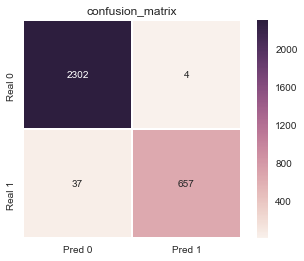

In [34]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, forest_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

# Adaboost Classifier

In [35]:
#Using Adaboost Classifier

features_one = X_train[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","department","salary"]].values
num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
                               
ada = AdaBoostClassifier(n_estimators = 100,learning_rate=1.5)
ada.fit(features_one, Y_train)
# save_classifier = open("adaboost.pickle","wb")
# pickle.dump(ada, save_classifier)
# save_classifier.close()


# Print normal score
print(ada.score(features_one, Y_train))

results1 = cross_validation.cross_val_score(ada, features_one, Y_train , cv=kfold , scoring=scoring1)
print(results1)
#Print cross validation score
print(results1.mean(), results1.std())

results2 = cross_validation.cross_val_score(ada, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

# Extract the features from the test set:
test_features = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","department","salary"]].values
# Make your prediction using the test set:
ada_prediction = ada.predict(test_features)

acc = accuracy_score(Y_test, ada_prediction)
precision = precision_score(Y_test, ada_prediction)
recall = recall_score(Y_test, ada_prediction)
f1score = f1_score(Y_test, ada_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(ada_prediction))

print(ada.feature_importances_)

0.961496791399
[ 0.9575      0.96        0.95583333  0.95833333  0.95666667  0.955
  0.95833333  0.96583333  0.96916667  0.96330275]
0.959996941896 0.00440728275161
0.981512599501 0.00464656056399
Accuracy of the algorithm:  0.958333333333
Precison of the algorithm:  0.897902097902
Recall of the algorithm:  0.92507204611
F1_Score of the algorithm:  0.911284599006
Total number of employees which are likely to leave:  715
[ 0.27  0.28  0.06  0.24  0.07  0.03  0.01  0.    0.04]


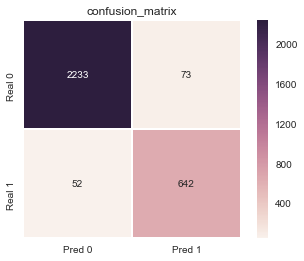

In [36]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, ada_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

Therefore we can canclude that Random Forest and AdaBoost Algorithms performs well.................

# 1. Feature Selection For Random Forest
    Parameters Removed : 
    * promotion_last_5years
    * work_accident
    * salary
    * department

# Final Model Using [Random Forest]

    Parameters Used : 
    * satisfaction_level
    * Last_evaluation                                                                                            
    * Number_project
    * Average_monthly_hours
    * time_spend_company

In [37]:
# Using Random Forest with updated features.

features_one = X_train[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","salary"]].values
num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
                               
forest1 = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
forest1.fit(features_one, Y_train)
# save_classifier = open("random_forest_updated.pickle","wb")
# pickle.dump(forest1, save_classifier)
# save_classifier.close()


# Print normal score
print(forest1.score(features_one, Y_train))

results1 = cross_validation.cross_val_score(forest1, features_one, Y_train, cv=kfold,scoring=scoring1)

#Print cross validation score
print(results1.mean(), results1.std())

results2 = cross_validation.cross_val_score(forest1, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

# Extract the features from the test set:
test_features = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","salary"]].values
# Make your prediction using the test set:
forest1_prediction = forest1.predict(test_features)

acc = accuracy_score(Y_test, forest1_prediction)
precision = precision_score(Y_test, forest1_prediction)
recall = recall_score(Y_test, forest1_prediction)
f1score = f1_score(Y_test, forest1_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(forest1_prediction))

print(forest1.feature_importances_)

0.986082173514
0.981332082291 0.00434827626085
0.99234603421 0.00421636520084
Accuracy of the algorithm:  0.986333333333
Precison of the algorithm:  0.99245852187
Recall of the algorithm:  0.948126801153
F1_Score of the algorithm:  0.969786293294
Total number of employees which are likely to leave:  663
[ 0.337759    0.11769339  0.19143987  0.14634088  0.20086925  0.00589761]


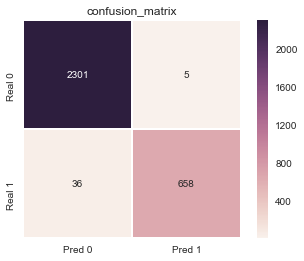

In [38]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, forest1_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

# 2. Feature Selection For AdaBoost
    Parameters Removed : 
    * promotion_last_5years
    * work_accident
    * department

# Final Model Using [AdaBoost ]

    Parameters Used : 
    * satisfaction_level
    * Last_evaluation                                                                                            
    * Number_project
    * Average_monthly_hours
    * time_spend_company
    * salary

In [39]:
#Using Adaboost Classifier with updated features...

features_one = X_train[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company"]].values
num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
                               
ada1 = AdaBoostClassifier(n_estimators = 100,learning_rate=1.5)
ada1.fit(features_one, Y_train)
# save_classifier = open("adaboost_updated.pickle","wb")
# pickle.dump(ada1, save_classifier)
# save_classifier.close()


# Print normal score
print(ada1.score(features_one, Y_train))

results1 = cross_validation.cross_val_score(ada1, features_one, Y_train , cv=kfold , scoring=scoring1)
print(results1)
#Print cross validation score
print(results1.mean(), results1.std())

results2 = cross_validation.cross_val_score(ada1, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

# Extract the features from the test set:
test_features = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company"]].values
# Make your prediction using the test set:
ada1_prediction = ada1.predict(test_features)

acc = accuracy_score(Y_test, ada1_prediction)
precision = precision_score(Y_test, ada1_prediction)
recall = recall_score(Y_test, ada1_prediction)
f1score = f1_score(Y_test, ada1_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(ada1_prediction))

print(ada1.feature_importances_)

0.960496708059
[ 0.96416667  0.95916667  0.95833333  0.95916667  0.96166667  0.9525
  0.95833333  0.96166667  0.96583333  0.9616347 ]
0.960246802891 0.00349574029149
0.9792986342 0.00502854955973
Accuracy of the algorithm:  0.958333333333
Precison of the algorithm:  0.904694167852
Recall of the algorithm:  0.916426512968
F1_Score of the algorithm:  0.910522548318
Total number of employees which are likely to leave:  703
[ 0.27  0.28  0.11  0.27  0.07]


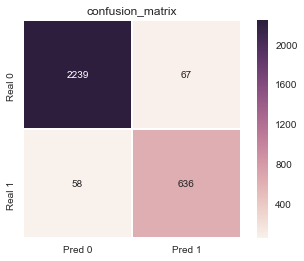

In [40]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, ada1_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()